In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels.shape

(25000,)

In [6]:
max([max(seq) for seq in train_data])

9999

In [7]:
train_labels[0]

1

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = {value:key for key, value in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(index-3, '?') for index in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Vectorize data

In [13]:
import numpy as np

In [14]:
np.array([0,1,2,3,4])[[2,4]]

array([2, 4])

In [17]:
def vectorize_sequence(sequences, dimension=10000):
    vec = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        vec[i, sequences[i]] = 1
    return vec

In [18]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [19]:
x_train[0,:]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [51]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu', input_shape = (10000,)))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=partial_x_train, y=partial_y_train, batch_size=512, 
                    epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.5271 - acc: 0.8021 - val_loss: 0.4445 - val_acc: 0.8370
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.3647 - acc: 0.8901 - val_loss: 0.3667 - val_acc: 0.8677
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2894 - acc: 0.9114 - val_loss: 0.3156 - val_acc: 0.8849
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2423 - acc: 0.9265 - val_loss: 0.2941 - val_acc: 0.8890
Epoch 5/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.2091 - acc: 0.9379 - val_loss: 0.2821 - val_acc: 0.8905
Epoch 6/20
15000/15000 [==============================] - 2s 100us/step - loss: 0.1841 - acc: 0.9454 - val_loss: 0.2800 - val_acc: 0.8887
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1640 - acc: 0.9517 - val_loss: 0.2744 - val_

In [45]:
history_dict = history.history

In [46]:
history_dict.keys()

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])

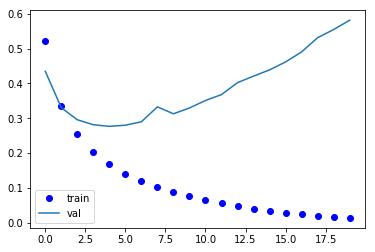

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(history_dict['loss'])), history_dict['loss'], 'bo', label='train')
plt.plot(history_dict['val_loss'], label='val')
plt.legend()
plt.show()

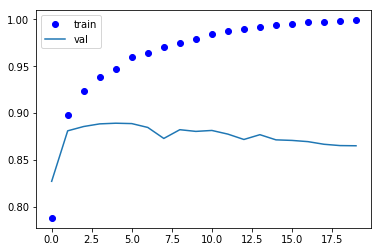

In [48]:
plt.plot(history_dict['acc'], 'bo', label='train')
plt.plot(history_dict['val_acc'], label='val')
plt.legend()
plt.show()

In [49]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, batch_size=512, 
                    epochs=4)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4859 - acc: 0.8048
Epoch 2/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2773 - acc: 0.9083
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2093 - acc: 0.9272
Epoch 4/4
25000/25000 [==============================] - 1s 58us/step


In [50]:
results

[0.2998987296581268, 0.88084]

In [43]:
model.predict(x_test)

array([[0.14694838],
       [0.9998467 ],
       [0.36234248],
       ...,
       [0.09242523],
       [0.04641861],
       [0.33305982]], dtype=float32)